# A Search Implementation

We can use the binomial coefficient to calculate the probability distribution of the minimum of the range without duplicates.



In [1]:
import random
from typing import Generator
from math import comb


def find_min_value_given_probability(N, n, target_probability):
    # Calculate the total combinations for the sample
    total_combinations = comb(N, n)
    
    # Iterate to find the m that matches the target probability
    for m in range(1, N - n + 2):
        current_combination = comb(N - m, n - 1)
        probability = current_combination / total_combinations
        
        if probability >= target_probability:
            return m

        target_probability -= probability
    
    # If no exact match is found, return the last m
    return m


def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    n = batch_size

    while n > 0:
        N = max_num - min_num + 1
        random_probability = random.random()
        m = find_min_value_given_probability(N, n, random_probability)
        number = min_num + m - 1
        min_num = number + 1
        n -= 1
        yield number

In [2]:
list(generate_unique_random_numbers(1, 10, 3))

[3, 6, 9]

## Distribution

The distribution of this approach is even.

Chi-Square Statistic: 10.666666666666666
P-Value: 0.29925083045118167


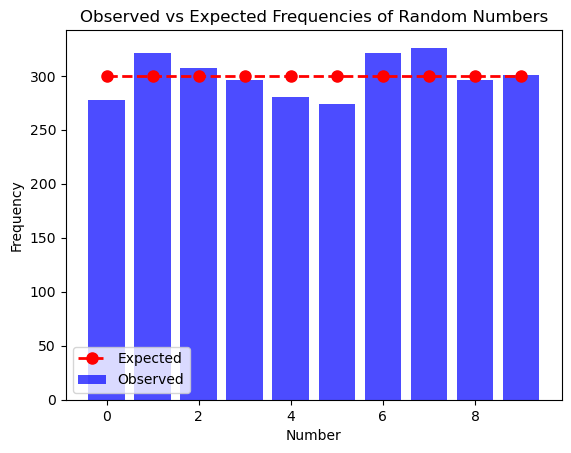

In [3]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The execution time is pretty bad.

It is very interesting how the longest execution time is for a 50% batch percentage. That suggests that there is probably a better way to do it.

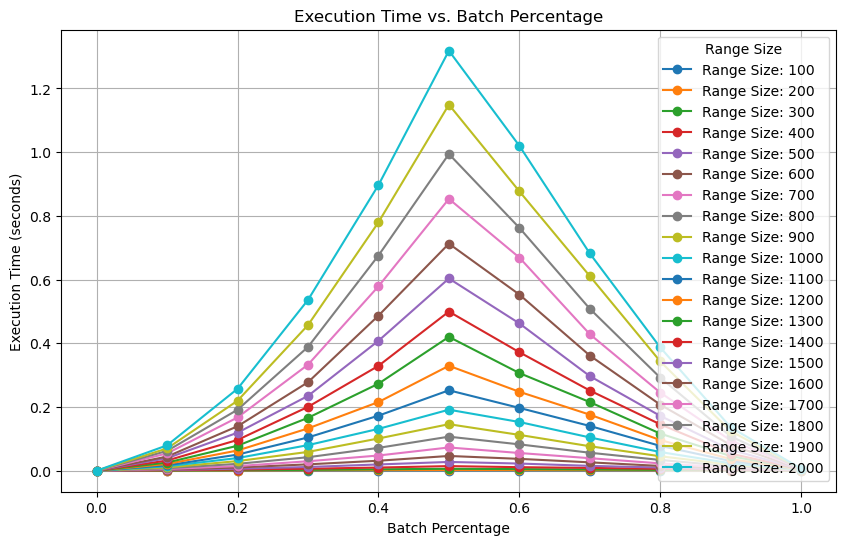

In [4]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size), range(100,2001,100), 10)
plot.execution_time(df)

## Memory Usage

The memory usage is constant.